In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [3]:
def isHeadorBody(x,label):
    for i in x:
        if i == label:
            return True
    return False

def trans_to_en(x):
    ww = ""
    for w in x:
        if w == "头":
            ww += "-head"
        elif w == "身":
            ww += "-body"
    return ww

def combine_cols(row, col_names):
    for i in range(len(row)): 
        if row.iloc[i] == True:
            return col_names[i]

def get_meta_file(path):
    metadata_list = []
    for file in os.listdir(path):
        if file.endswith('.png'):
            filename = file.split(".")[0]
            metadata_list.append(filename.split("-"))
    
    metadata = pd.DataFrame(metadata_list, columns=["id", "parent_id", "category", "period", "head_body"])
    metadata["head_body"] = metadata["head_body"].apply(lambda x: x.split("+"))

    metadata["head"] = metadata["head_body"].apply(lambda x: isHeadorBody(x,"头"))
    metadata["body"] = metadata["head_body"].apply(lambda x: isHeadorBody(x,"身"))
    metadata["head_body_en"] = metadata["head_body"].apply(trans_to_en)
    metadata['TheBuddha(Sidhartha)'] = metadata["category"].isin(["三尊","二佛", "佛"])
    metadata['Bodhisattva'] = metadata["category"] == '菩萨'
    metadata["Northern_Wei"] = metadata["period"].isin(['东魏', '东魏_北齐', '北魏', '北魏_东魏', '北魏晚期'])
    metadata["Northern_Qi"] = metadata["period"] == '北齐'
    metadata["Sui"] = metadata["period"] == '隋'
    metadata["Tang"] = metadata["period"] == '唐'

    metadata['period2'] = metadata[['Northern_Wei', 'Northern_Qi', 'Sui', 'Tang']].apply(combine_cols, axis=1, args=[['Northern_Wei', 'Northern_Qi', 'Sui', 'Tang']])
    metadata['types'] = metadata[['TheBuddha(Sidhartha)', 'Bodhisattva']].apply(combine_cols, axis=1, args=[['TheBuddha(Sidhartha)', 'Bodhisattva']])

    metadata.to_csv("metadata.csv", encoding='utf-8-sig', index=False)

    return metadata

In [4]:
metadata = get_meta_file("/Users/DXY/Documents/24S_EPFL_DH/History/History_Buddha/longxing_dataset")

In [5]:
metadata = pd.read_csv('metadata.csv')
metadata.head()

,id,parent_id,category,period,head_body,head,body,head_body_en,TheBuddha(Sidhartha),Bodhisattva,Northern_Wei,Northern_Qi,Sui,Tang,period2,types
0,88,88,佛,北齐,['身'],False,True,-body,True,False,False,True,False,False,Northern_Qi,TheBuddha(Sidhartha)
1,66,66,佛,北齐,"['头', '身']",True,True,-head-body,True,False,False,True,False,False,Northern_Qi,TheBuddha(Sidhartha)
2,90,90,佛,北齐,['身'],False,True,-body,True,False,False,True,False,False,Northern_Qi,TheBuddha(Sidhartha)
3,28,28,菩萨,北魏_东魏,"['头', '身']",True,True,-head-body,False,True,True,False,False,False,Northern_Wei,Bodhisattva
4,190,190,菩萨,北齐,['头'],True,False,-head,False,True,False,True,False,False,Northern_Qi,Bodhisattva


In [6]:
table1 = pd.pivot_table(metadata, values='id', index=['period2'],
                       columns=['head', 'body'], aggfunc="count", fill_value=0)
table1

head         False True       
body         True  False True 
period2                       
Northern_Qi     37    22    28
Northern_Wei    10    20    31
Sui              0     0     1
Tang             2     0     0

In [7]:
table2 = pd.pivot_table(metadata, values='id', index=['types'],
                       columns=['head', 'body'], aggfunc="count", fill_value=0)
table2

head                 False True       
body                 True  False True 
types                                 
Bodhisattva             21    15    18
TheBuddha(Sidhartha)    28    27    42

In [8]:
print(f"we have {metadata.shape[0]} statues in our dataset")

we have 151 statues in our dataset


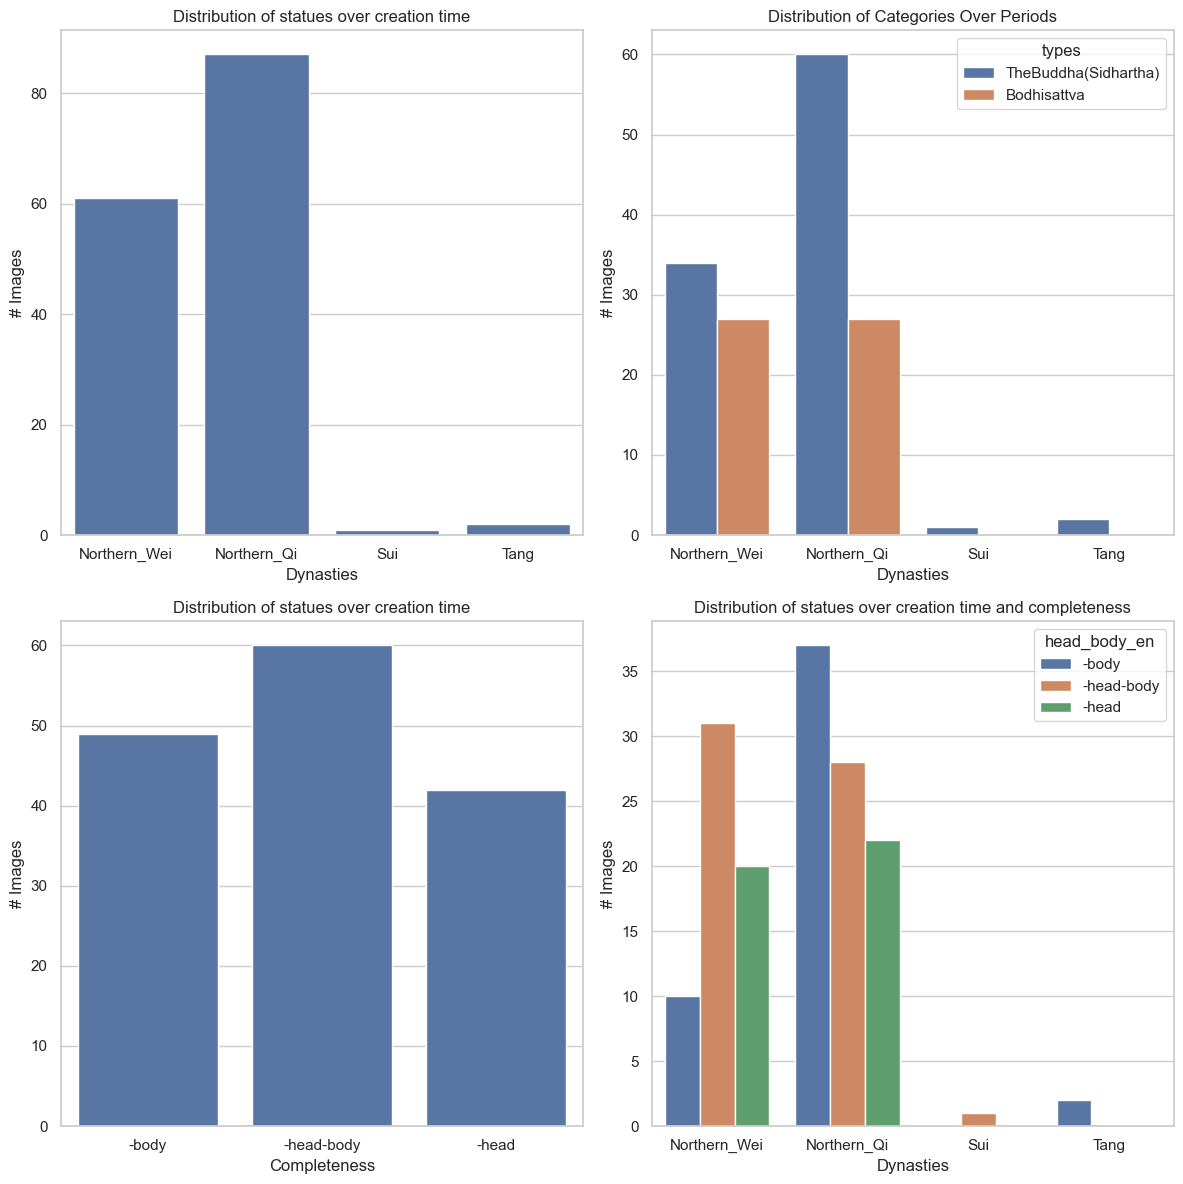

In [10]:
order = ["Northern_Wei", "Northern_Qi", "Sui", "Tang"]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.set_theme(style="whitegrid") 

sns.countplot(x='period2', data=metadata, ax=axes[0, 0],order=order)
axes[0, 0].set_title("Distribution of statues over creation time")
axes[0, 0].set_xlabel("Dynasties")
axes[0, 0].set_ylabel("# Images")

sns.countplot(x='period2', hue='types', data=metadata, ax=axes[0, 1],order=order)
axes[0, 1].set_title("Distribution of Categories Over Periods")
axes[0, 1].set_xlabel("Dynasties")
axes[0, 1].set_ylabel("# Images")

sns.countplot(x='head_body_en', data=metadata, ax=axes[1,0])
axes[1, 0].set_title("Distribution of statues over creation time")
axes[1, 0].set_xlabel("Completeness")
axes[1, 0].set_ylabel("# Images")

sns.countplot(x='period2', hue='head_body_en', data=metadata, ax=axes[1, 1],order=order)
axes[1, 1].set_title("Distribution of statues over creation time and completeness")
axes[1, 1].set_xlabel("Dynasties")
axes[1, 1].set_ylabel("# Images")

plt.tight_layout()
plt.show()